In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

### 1a 
plotting (x,v)

In [2]:
def file_process(s):
    f = open(s, "r")
    lines = f.readlines()
    f.close()
    convert = []
    result = []

    for line in lines:
        for element in line.split():
            convert.append(float(element))
        result.append(convert)
        convert = []

    result = np.array(result)
    return result

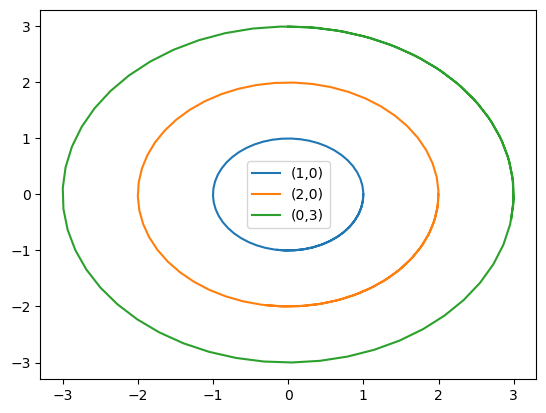

In [3]:
result1 = file_process("result1_l.txt")
result2 = file_process("result2_l.txt")
result3 = file_process("result3_l.txt")

time = result1[:,0]
x = result1[:,2]
v = result1[:,3]
plt.plot(x, v, label = "(1,0)")

time = result2[:,0]
x = result2[:,2]
v = result2[:,3]
plt.plot(x, v, label = "(2,0)")

time = result3[:,0]
x = result3[:,2]
v = result3[:,3]
plt.plot(x, v, label = "(0,3)")

plt.legend()
plt.show()

### 1b
non linear

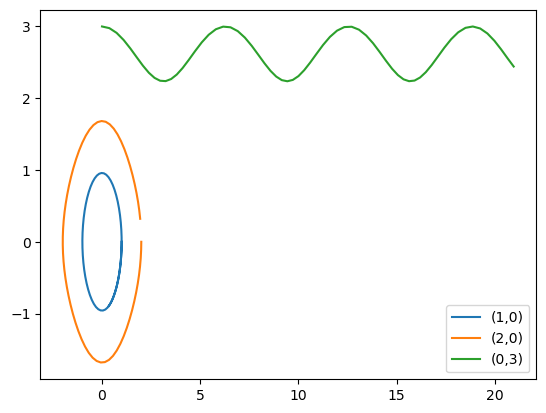

In [4]:
result1 = file_process("result1.txt")
result2 = file_process("result2.txt")
result3 = file_process("result3.txt")

time = result1[:,0]
x = result1[:,2]
v = result1[:,3]
plt.plot(x, v, label = "(1,0)")

time = result2[:,0]
x = result2[:,2]
v = result2[:,3]
plt.plot(x, v, label = "(2,0)")

time = result3[:,0]
x = result3[:,2]
v = result3[:,3]
plt.plot(x, v, label = "(0,3)")

plt.legend()
plt.show()

Simulation of solar sphere

In [5]:
def accel(m: np.ndarray, x: np.ndarray, eps_sq: float) -> np.ndarray:
    """Compute accelerations for harmonic oscillator(s)

    Args:
        m (array of shape (N,)): masses of points
        x (array of shape (N, 3)): positions of points
        eps_sq (float): softening parameter

    Returns:
        a (array of shape (N, 3)): accelerations of points
    """
    n = len(m)  # number of points
    a = np.zeros((n, 3))  # initialize accelerations
    for i in range(n):  # loop over all points...
        for j in range(i + 1, n):  # loop over i, j pairs
            r_vec = x[i] - x[j]
            r_sq = (r_vec**2).sum()
            acc = m[j] * r_vec / (r_sq + eps_sq)**(3/2)
            a[i] += -acc
            a[j] += acc
    return a

In [6]:
def leapstep(m: np.ndarray, x: np.ndarray, v: np.ndarray, dt: float, eps_sq: float):
    """Take one step using the leapfrog integrator, formulated
    as a mapping from t to t + dt.  WARNING: this integrator is not
    accurate unless the timestep dt is fixed from one call to another.

    Args:
        m (array of shape (N,)): mass of all points
        x (array of shape (N, 3)): coordinate of all points
        v (array of shape (N, 3)): velocities of all points
        dt (float): timestep for integration
        eps_sq (float): softening parameter (epsilon^2)
    """
    v += 0.5 * dt * accel(m, x, eps_sq) # advance vel by half-step
    x += dt * v # advance pos by full-step
    v += 0.5 * dt * accel(m, x, eps_sq) # complete velocity step

In [7]:
def save_state(m, x, tnow):
    """Save the current state to file.

    Args:
        m (array of shape (N,)): masses of all points
        x (array of shape (N, 3)): positions of all points
        tnow (float): current time, in seconds
    """
    with open("leapint.py.data", "a") as f:
        for i in range(len(m)):  # loop over all points...
            #f.write("%8.4f%12.6f%12.6f%12.6f%12.6f\n" % (tnow, m[i], x[i][0], x[i][1], x[i][2]))

            # modified write format to prevent data cluster and read failure
            f.write(format(tnow, '.5f') + " "+format(m[i], '12.6f') +" "+ format(x[i][0], '12.6f') + " "+format(x[i][1], '12.6f') + " "+format(x[i][2], '12.6f')+ "\n")

In [9]:
%%time

n = 10 # number of planets

# initialization of mass, position and velocity np.array
# order: mercury, venus, earth, mars, jupiter, saturn, uranus, neptune, pluto, sun
m = np.array([0.0553, 0.815, 1, 0.107, 317.8, 95.2, 14.5, 17.1, 0.0022, 333000]) # initialization of mass based on ratio to earth's mass from NASA
#m = m * 5.972*10**24 # get the true mass of earth
distance = np.array([57900000, 108200000, 149600000, 227900000, 778600000, 1433500000, 2872500000, 4495100000, 5906380000, 0.0]) #km
distance = distance*10**3*10**-12 # set it to 10^-12 meter scale
x = np.zeros((n,3)) # 3-d position
v = np.zeros((n,3)) # 3-d velocity

# initial condition
dt = 0.002000 # time step
tmax = 0.4000000 # simulation duration
eps_sq = 0.250000 # epilson^2

# set initial position and velocity 
# assume only x-component velocity at start
for i in range(n):
    #x[i] = [np.sqrt(distance[i]/2), np.sqrt(distance[i]/2), 0]
    x[i] = [distance[i], 0, 0]
    v[i] = [0,0,0]


# next, set integration parameters
tnow = 0.0  # set initial time
mstep = int(tmax / dt)  # number of steps to take
print(tnow)

# delete old output if it exists
if os.path.exists("leapint.py.data"):
    os.remove("leapint.py.data")

save_state(m,x,tnow)

# now, loop performing integration
for nstep in range(mstep):  # loop mstep times in all
    leapstep(m, x, v, dt, eps_sq)  # take integration step
    tnow = tnow + dt  # and update value of time
    save_state(m, x, tnow)  # then output last step

0.0
CPU times: user 68.4 ms, sys: 54 µs, total: 68.4 ms
Wall time: 68.2 ms


Question about above: sun is moving as well, is this what it supposed to be?
